**Description de la problématique**

Je suis un data scientist dans la start-up de la EdTech qui propose des contenus de formation en ligne pour une public de niveau lycée et université. Cette dernière a un projet d'expansion à l'international. Mon manager me confie la mission d'analyse exploratoire des données sur l'éducation de la banque mondiale afin de déterminer si elles permettent d'informer sur le projet. 

Cette analyse devrait nous permettre de répondre aux questions suivantes: 

1. Quels sont les pays aec un fort potentiel de clients pour nos services ? 
2. Pour chacun de ces pays, quelle sera l'évolution de ce potentiel de clients ? 
3. Dans quels pays l'entreprise doit-elle opérer en priorité ?

**Analyse générale et découverte des jeux de données**

*Défintion de l'environnement de travail*

Importons les librairies python utiles à notre anlayse. 

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Définition des fonctions**

Définssons des fonctions utiles à notre exploration à savoir: Une qui nous permettra d'afficher les types de variables, la taille et les données statistiques du jeu de données et une autre fonction pour calculer le taux et le nombre de valeurs manquantes du jeu de données.

In [164]:
#Taille du jeu, types de variable et données statistiques
def analyse_jeu(data):
    return ["La taille du jeu de données est : ", data.shape,
           " ", "Les types de variables du jeu de données sont :", data.dtypes,
           " ", "Les données statistiques du jeu de données sont :", data.describe()]

In [165]:
#Pourcentage des valeurs manquantes
def pourcentage_valeurs_manquantes(data):
    n = data.shape[0]
    ret = pd.DataFrame(data.isna().sum(), columns=['nb_manquantes'])
    ret['pourcentage'] = (ret['nb_manquantes']/n)*100
    return ret

**Analyse du jeu de données 'EdStatsCountry'**

Le jeu de données nous fournit des statistiques de plusieurs pays relatif à leur monnaie utilisée,leur région géographique,la norme de diffusion des données du FMI,la date du dernier recensement de la population,la dernière enquête auprès des ménages,la source des données les plus récentes sur les revenus et les dépenses,le dernier recensement agricole et industriel,les dernières données commerciales et de prélèvement d'eau.

In [166]:
#Lecture du jeu de données
Stats_Country = pd.read_csv("/kaggle/input/dataset-edstats/Dataset_Edstats_csv/EdStatsCountry.csv")

Faisons une analyse de notre jeu de données

In [167]:
analyse_jeu(Stats_Country)

['La taille du jeu de données est : ',
 (241, 32),
 ' ',
 'Les types de variables du jeu de données sont :',
 Country Code                                          object
 Short Name                                            object
 Table Name                                            object
 Long Name                                             object
 2-alpha code                                          object
 Currency Unit                                         object
 Special Notes                                         object
 Region                                                object
 Income Group                                          object
 WB-2 code                                             object
 National accounts base year                           object
 National accounts reference year                     float64
 SNA price valuation                                   object
 Lending category                                      object
 Other groups          

In [168]:
#Nombre et Pourcentage des valeurs manquantes du jeu
pourcentage_valeurs_manquantes(Stats_Country)

,nb_manquantes,pourcentage
Country Code,0,0.000000
Short Name,0,0.000000
Table Name,0,0.000000
Long Name,0,0.000000
2-alpha code,3,1.244813
Currency Unit,26,10.788382
Special Notes,96,39.834025
Region,27,11.203320
Income Group,27,11.203320
WB-2 code,1,0.414938


In [169]:
#jeu de données
Stats_Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


**Analyse du jeu de données 'EdStatsSeries'**
Le jeu de donnée nous fournit également des informations complémentaires par rapport au jeu de données notamment des informations relatives à la méthode d'agrégation. Les limites et exceptions le concept statistiques et méthodologie utilisée, la pertinence pour le développement. 

In [170]:
#Lecture du jeu de données 
Stats_Country_Series = pd.read_csv("/kaggle/input/dataset-edstats/Dataset_Edstats_csv/EdStatsCountry-Series.csv")

In [171]:
analyse_jeu(Stats_Country_Series)

['La taille du jeu de données est : ',
 (613, 4),
 ' ',
 'Les types de variables du jeu de données sont :',
 CountryCode     object
 SeriesCode      object
 DESCRIPTION     object
 Unnamed: 3     float64
 dtype: object,
 ' ',
 'Les données statistiques du jeu de données sont :',
        Unnamed: 3
 count         0.0
 mean          NaN
 std           NaN
 min           NaN
 25%           NaN
 50%           NaN
 75%           NaN
 max           NaN]

In [172]:
pourcentage_valeurs_manquantes(Stats_Country_Series)

,nb_manquantes,pourcentage
CountryCode,0,0.0
SeriesCode,0,0.0
DESCRIPTION,0,0.0
Unnamed: 3,613,100.0


In [173]:
Stats_Country_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


**Analyse du jeu de donnés 'EdStatsData'**

Le jeu de donnée fournit des informations sur des pays et régions du monde relatives à l'évolution entre 1970 et 2100 de 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation.

In [174]:
# Lecture du jeu de donnée
Stats_Data= pd.read_csv("/kaggle/input/dataset-edstats/Dataset_Edstats_csv/EdStatsData.csv")

In [175]:
analyse_jeu(Stats_Data)

['La taille du jeu de données est : ',
 (886930, 70),
 ' ',
 'Les types de variables du jeu de données sont :',
 Country Name       object
 Country Code       object
 Indicator Name     object
 Indicator Code     object
 1970              float64
                    ...   
 2085              float64
 2090              float64
 2095              float64
 2100              float64
 Unnamed: 69       float64
 Length: 70, dtype: object,
 ' ',
 'Les données statistiques du jeu de données sont :',
                1970          1971          1972          1973          1974  \
 count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
 mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
 std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
 min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
 25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
 50%    6.317724e+00  6

In [176]:
pourcentage_valeurs_manquantes(Stats_Data)

,nb_manquantes,pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,814642,91.849639
...,...,...
2085,835494,94.200670
2090,835494,94.200670
2095,835494,94.200670
2100,835494,94.200670


In [177]:
Stats_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
Stats_Data.shape[0]

886930

**Analyse des données EdStatsFootNote**

Le jeu de donnée nous fournit des informations complémentaires par rapport au jeu de donnée précedent notamment des informations relatives aux indicateurs en y associant l'année et une description.

In [179]:
# Lecture du jeu de donnée
Stats_FootNote= pd.read_csv("/kaggle/input/dataset-edstats/Dataset_Edstats_csv/EdStatsFootNote.csv")

In [180]:
analyse_jeu(Stats_FootNote)

['La taille du jeu de données est : ',
 (643638, 5),
 ' ',
 'Les types de variables du jeu de données sont :',
 CountryCode     object
 SeriesCode      object
 Year            object
 DESCRIPTION     object
 Unnamed: 4     float64
 dtype: object,
 ' ',
 'Les données statistiques du jeu de données sont :',
        Unnamed: 4
 count         0.0
 mean          NaN
 std           NaN
 min           NaN
 25%           NaN
 50%           NaN
 75%           NaN
 max           NaN]

In [181]:
pourcentage_valeurs_manquantes(Stats_FootNote)

,nb_manquantes,pourcentage
CountryCode,0,0.0
SeriesCode,0,0.0
Year,0,0.0
DESCRIPTION,0,0.0
Unnamed: 4,643638,100.0


In [182]:
Stats_FootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


**Stratégie d'Analyse**

Il nous semble pertinent pour l'analyse de ne considérer que les pays dont les données de recensement sont assez récentes. Pour se faire, nous analyserons que les pays dont la dernière année de recensement est supérieure ou égale à 2010.

In [183]:
# Définissions un jeu de données dont les pays ont une année de recensement récente
ed_stats_country_Recensement = Stats_Country[Stats_Country["Latest population census"] >='2010']
ed_stats_country_Recensement[['Short Name']]

,Short Name
0,Aruba
3,Albania
4,Andorra
6,United Arab Emirates
7,Argentina
...,...
235,Samoa
236,Kosovo
238,South Africa
239,Zambia


Leur nombre est donc de 139 pays

In [184]:
# Je fais donc une jointure entre les pays récents et les données lié aux indicateurs
data_2010 = pd.merge(ed_stats_country_Recensement, Stats_Data)

In [185]:
# Analysons la nouvelle jointure
analyse_jeu(data_2010)

['La taille du jeu de données est : ',
 (509435, 101),
 ' ',
 'Les types de variables du jeu de données sont :',
 Country Code     object
 Short Name       object
 Table Name       object
 Long Name        object
 2-alpha code     object
                  ...   
 2085            float64
 2090            float64
 2095            float64
 2100            float64
 Unnamed: 69     float64
 Length: 101, dtype: object,
 ' ',
 'Les données statistiques du jeu de données sont :',
        National accounts reference year  Latest industrial data  \
 count                      84295.000000           278540.000000   
 mean                        2002.652174             2008.250000   
 std                            5.321103                2.306317   
 min                         1987.000000             2001.000000   
 25%                         2000.000000             2008.000000   
 50%                         2005.000000             2009.000000   
 75%                         2005.000000       

In [186]:
# Analyse des stats de la jointure 
pourcentage_valeurs_manquantes(data_2010)

,nb_manquantes,pourcentage
Country Code,0,0.000000
Short Name,0,0.000000
Table Name,0,0.000000
Long Name,0,0.000000
2-alpha code,10995,2.158273
...,...,...
2085,477403,93.712250
2090,477403,93.712250
2095,477403,93.712250
2100,477403,93.712250


**Choix des indicateurs candidats pour analyse**

En relation avec notre problématique il nous semble pertinent de ne retenir que les indicateurs liés aux facteurs suivant : 

1. Démographie: Population par tranches d'âge à savoir 15-19 ans et 20-29 ans croissance de la population
2. Niveau d'éducation: Nombre et taux étudiants dans le secondaire et tertiaire ayant arretés de cursus normal d'éducation
3. Déploiement internet : Taux utilisation d'internet
4. Economique : PIB, PIB/habitant

In [187]:
indicateurs_candidats =data_2010['Indicator Name'].str.contains('GDP per capita|Internet users|Personal computers|population growth|Share of youth not in education, employment, or training, total|Percentage of population age 15-19 with no education|Percentage of population age 20-24 with no edu|Average years of total schooling, age 20-24, total|Average years of total schooling, age 15-19, total', case=False,na=False)

In [188]:
indicateurs_candidats

0         False
1         False
2         False
3         False
4         False
          ...  
509430    False
509431    False
509432    False
509433    False
509434    False
Name: Indicator Name, Length: 509435, dtype: bool

In [189]:
data_2010_critere = data_2010[indicateurs_candidats][['Indicator Code', 'Indicator Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']]

In [190]:
data_2010_critere

,Indicator Code,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017,2020
242,BAR.SCHL.1519,"Barro-Lee: Average years of total schooling, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,BAR.SCHL.2024,"Barro-Lee: Average years of total schooling, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,BAR.NOED.2024.ZS,Barro-Lee: Percentage of population age 20-24 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),24271.940421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
507066,UIS.XUNIT.GDPCAP.3.FSGOV,Government expenditure per upper secondary stu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507145,IT.NET.USER.P2,Internet users (per 100 people),6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989,NaN,NaN
507854,IT.CMP.PCMP.P2,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508077,SP.POP.GROW,Population growth (annual %),1.976756,2.109672,2.228306,2.309366,2.344799,2.345643,2.336070,NaN,NaN


In [191]:
data_2010_critere.duplicated().sum()

831

Eliminons les doublons

In [192]:
data_2010_critere['NB_NAN'] = data_2010_critere.isna().sum(axis=1)
data_2010_critere = data_2010_critere.sort_values('NB_NAN')
data_2010_critere = data_2010_critere.drop_duplicates('Indicator Code', keep='first')
data_2010_critere = data_2010_critere.drop('NB_NAN', axis=1)

**La liste des indicateurs candidats est :**

In [193]:
data_2010_critere[['Indicator Code', 'Indicator Name']]

,Indicator Code,Indicator Name
393401,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."
126917,SP.POP.GROW,Population growth (annual %)
433845,IT.NET.USER.P2,Internet users (per 100 people)
129519,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
129520,NY.GDP.PCAP.CD,GDP per capita (current US$)
129522,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
265161,SE.XPD.PRIM.PC.ZS,Government expenditure per primary student as ...
272501,SE.XPD.TERT.PC.ZS,Government expenditure per tertiary student as...
320141,SE.XPD.SECO.PC.ZS,Government expenditure per secondary student a...
217531,UIS.XUNIT.GDPCAP.3.FSGOV,Government expenditure per upper secondary stu...


In [194]:
int_temp = ['Short Name','Indicator Code','2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2020'] 
int_ = ['Region','Indicator Code','2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2020'] 

Définissons des fonctions pour extraire un dataframe contenant uniquement notre indicateur canditat en éliminant au préable les doublons relatif au pays et aux régions du monde.

In [195]:
def indicateur(ind):
    # on extrait un sous dataframe contenant uniquement l'indicateur
    mask=data_2010['Indicator Code']==ind
    df=pd.merge(data_2010,pd.DataFrame(data_2010.loc[mask,'Indicator Code']))[int_temp]
    # on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
    df['NB_NAN'] = df.isna().sum(axis=1)
    # trie des lignes en fonction du nombre de valeurs manquantes
    df = df.sort_values('NB_NAN')
    # suppression des duplicatas en gardant les versions les mieux remplies
    df = df.drop_duplicates('Short Name', keep='first')
    # on supprime la colonne qui n'est plus utile
    df = df.drop('NB_NAN', axis=1)
    return df

In [196]:
def indicateur_region(ind):
    # on extrait un sous dataframe contenant uniquement l'indicateur
    mask=data_2010['Indicator Code']==ind
    df=pd.merge(data_2010,pd.DataFrame(data_2010.loc[mask,'Indicator Code']))[int_]
    # on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
    df['NB_NAN'] = df.isna().sum(axis=1)
    # trie des lignes en fonction du nombre de valeurs manquantes
    df = df.sort_values('NB_NAN')
    # suppression des duplicatas en gardant les versions les mieux remplies
    df = df.drop_duplicates('Region', keep='first')
    # on supprime la colonne qui n'est plus utile
    df = df.drop('NB_NAN', axis=1)
    return df

In [197]:
def taux_remplissage(df):
    n=df.shape[0]
    ret=pd.DataFrame(df.isna().sum(),columns=['nb_manquantes'])
    ret['taux']=100-(ret['nb_manquantes']/n)*100
    return ret['taux'][2:].mean()

**Déterminons le taux de remplissage des indicateurs candidats**

In [198]:
taux = []
for ind in data_2010_critere['Indicator Code']:
    df=indicateur(ind)
    taux.append(taux_remplissage(df))
data_2010_critere['Taux Remplissage'] = taux

In [199]:
data_2010_critere

,Indicator Code,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017,2020,Taux Remplissage
393401,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",45421.228480,48524.632488,49658.652699,49537.585729,49958.443336,50723.712645,50458.169847,NaN,NaN,68.185452
126917,SP.POP.GROW,Population growth (annual %),0.291362,0.206748,0.139926,0.033170,0.105278,0.196589,0.147567,NaN,NaN,77.458034
433845,IT.NET.USER.P2,Internet users (per 100 people),41.000000,43.164004,47.076000,50.400000,51.254702,54.259618,56.514708,NaN,NaN,72.581934
129519,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),41785.556913,44125.331412,44259.259905,44354.736887,45022.565349,45412.556808,45745.789904,NaN,NaN,72.422062
129520,NY.GDP.PCAP.CD,GDP per capita (current US$),41785.556913,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502,42069.597987,NaN,NaN,73.461231
129522,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",39263.187791,42692.519757,43564.148017,45232.197853,47195.602948,48170.263465,48884.762872,NaN,NaN,68.185452
265161,SE.XPD.PRIM.PC.ZS,Government expenditure per primary student as ...,15.714400,17.062691,16.012600,16.819361,15.637460,15.990440,NaN,NaN,NaN,29.736211
272501,SE.XPD.TERT.PC.ZS,Government expenditure per tertiary student as...,18.513960,15.294790,19.975479,23.665730,25.658119,26.867701,NaN,NaN,NaN,26.698641
320141,SE.XPD.SECO.PC.ZS,Government expenditure per secondary student a...,18.001490,19.146839,20.815069,20.084440,18.914980,18.382919,NaN,NaN,NaN,27.657874
217531,UIS.XUNIT.GDPCAP.3.FSGOV,Government expenditure per upper secondary stu...,8.422260,9.442410,12.076850,10.665030,10.939330,NaN,NaN,NaN,NaN,17.026379


In [200]:
data_2010_critere[['Indicator Code','Taux Remplissage']]

,Indicator Code,Taux Remplissage
393401,NY.GDP.PCAP.PP.KD,68.185452
126917,SP.POP.GROW,77.458034
433845,IT.NET.USER.P2,72.581934
129519,NY.GDP.PCAP.KD,72.422062
129520,NY.GDP.PCAP.CD,73.461231
129522,NY.GDP.PCAP.PP.CD,68.185452
265161,SE.XPD.PRIM.PC.ZS,29.736211
272501,SE.XPD.TERT.PC.ZS,26.698641
320141,SE.XPD.SECO.PC.ZS,27.657874
217531,UIS.XUNIT.GDPCAP.3.FSGOV,17.026379


**Réprésentation graphique du taux de remplissage des indicateurs candidats**

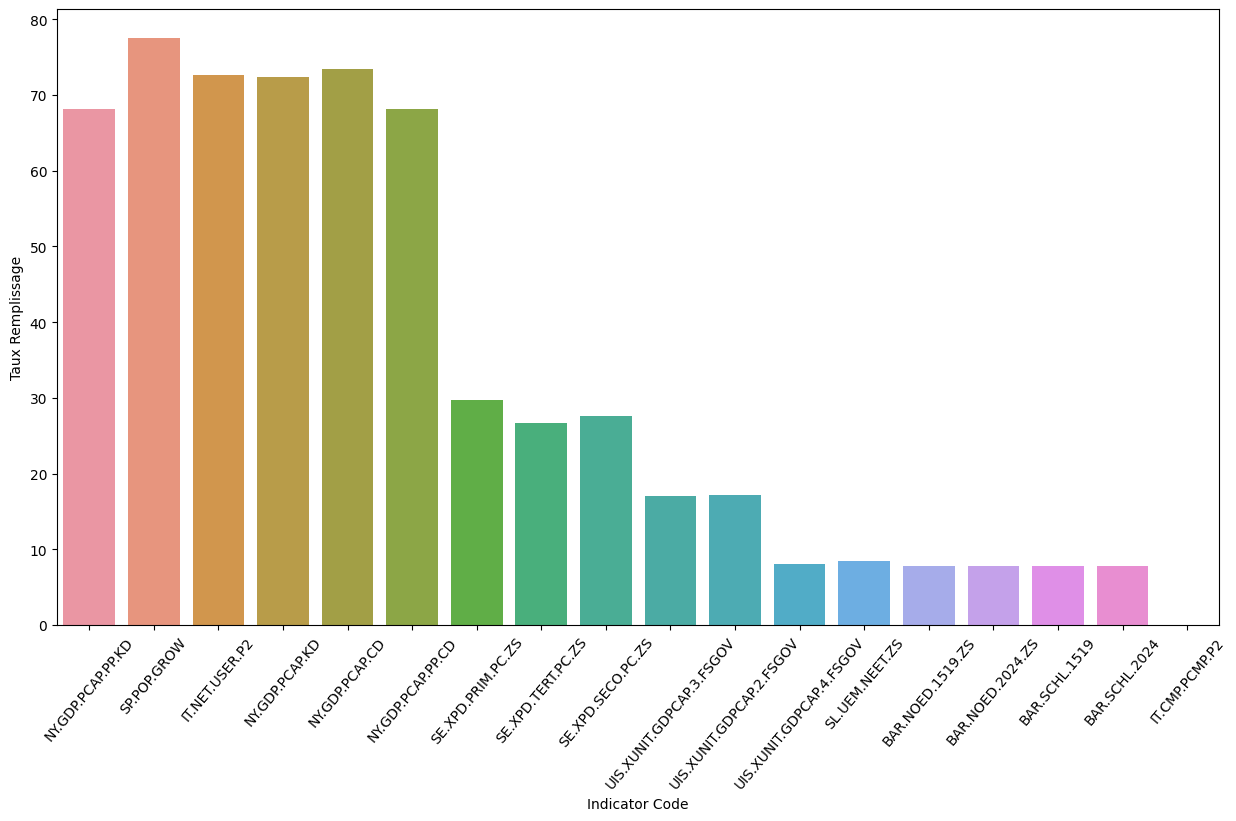

In [201]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Indicator Code', y = 'Taux Remplissage', data = data_2010_critere)
ax_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

**Choix définitif des indicateurs**

Le critère de choix des indicateurs sera évidemmenet lié à leur taux de remplissage. Il nous semble pertinent de ne retenir que les indicateurs ayant un taux de remplissage supérieur à 70%

In [202]:
indicateur_definitifs = data_2010_critere[data_2010_critere["Taux Remplissage"]>=70]['Indicator Code']
indicateurs_definitifs = pd.merge(data_2010_critere, indicateur_definitifs)
indicateurs_definitifs[['Indicator Code', 'Indicator Name', 'Taux Remplissage']]

,Indicator Code,Indicator Name,Taux Remplissage
0,SP.POP.GROW,Population growth (annual %),77.458034
1,IT.NET.USER.P2,Internet users (per 100 people),72.581934
2,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),72.422062
3,NY.GDP.PCAP.CD,GDP per capita (current US$),73.461231


Les indicateurs 'GDP per capita (constant 2005 US$)' et 'GDP per capita (current US)' etant du même type nous décidons de retenir celui qui a le taux de remplissage le plus élevé.il en resort donc le choix de l'indicateur 'GDP per capita (current US))'.

**Analyse des indicateurs définitifs choisis**

Définissions notre interval temporel d'analyse

In [203]:
years = ['2010', '2011', '2012','2013','2014', '2015', '2016', '2017', '2020']

**Indicateur Population Growth (annual %)**

Définissons un dataframe contenant uniquement cet indicateur relatif au pays

In [204]:
pop_growth = indicateur('SP.POP.GROW')

In [205]:
#Nombre de valeurs manquantes
pop_growth.isna().sum()

Short Name          0
Indicator Code      0
2010                0
2011                1
2012                0
2013                0
2014                1
2015                1
2016                1
2017              139
2020              139
dtype: int64

In [206]:
#Eliminons les colonnes n'ayant que des valeurs manquantes
pop_growth = pop_growth.drop(columns = ['2017', '2020'])

In [207]:
#Nous remplacons les valeurs manquantes par la médiane
years_ = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
for i in years_:
    pop_growth.loc[pop_growth[i].isna(), i] = pop_growth[i].median()

**Création des scores**

Nous allons créer un score entre 0 et 1 pour notre des pays ou régions du monde figurant parmi les meilleurs relatif à l'indicateur

In [208]:
somme = 0
for i in years_:
    somme += pop_growth[i]/pop_growth[i].max()
pop_growth['Score_Synt_P'] = (somme)/len(years_)
pop = pop_growth.sort_values('Score_Synt_P', ascending=False)[['Short Name', 'Indicator Code', 'Score_Synt_P']].iloc[:10]
pop

,Short Name,Indicator Code,Score_Synt_P
14364,Qatar,SP.POP.GROW,0.883865
13090,Oman,SP.POP.GROW,0.860948
9869,Kuwait,SP.POP.GROW,0.696183
12491,Niger,SP.POP.GROW,0.540376
17800,Tanzania,SP.POP.GROW,0.439675
6949,The Gambia,SP.POP.GROW,0.437598
6255,Gabon,SP.POP.GROW,0.437585
19181,Zambia,SP.POP.GROW,0.423415
15150,Senegal,SP.POP.GROW,0.413748
11892,Mauritania,SP.POP.GROW,0.410622


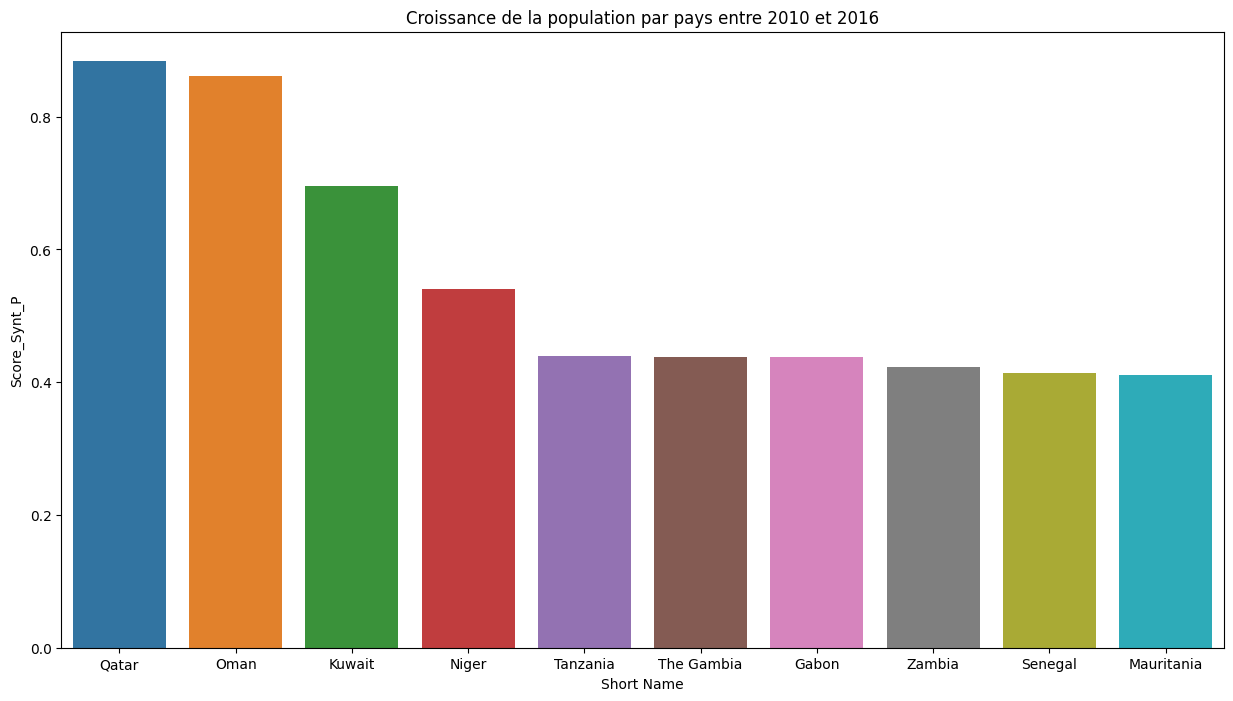

In [209]:
#le diagramme representatif du pourcentage de l'indicateur dans les pays ou il se retrouve
plt.figure(figsize = (15, 8))
ax = sns.barplot(x='Short Name', y = 'Score_Synt_P', data=pop)
title = plt.title("Croissance de la population par pays entre 2010 et 2016")

In [210]:
#Travaillons sur les indicateurs par régions dans le monde 
pop_growth_r = indicateur_region ('SP.POP.GROW')
pop_growth_r.isna().sum()

Region            1
Indicator Code    0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              8
2020              8
dtype: int64

Supprimons la ligne contenant la région manquante et les colonnes contenant que les valeurs manquantes 

In [211]:
index = pop_growth_r.loc[pop_growth_r['Region'].isna()].index
pop_growth_r = pop_growth_r.drop(index)
pop_growth_r = pop_growth_r.drop(columns=['2017', '2020'])

Comme pour les pays, affichons le classement par région relatif au Score_Synt_r_P

In [212]:
somme = 0
for i in years_:
    somme += pop_growth_r[i]/pop_growth_r[i].max()
    pop_growth_r['Score_Synt_r_P'] = (somme)/len(years_)
pop_r = pop_growth_r.sort_values('Score_Synt_r_P', ascending=False)[['Region', 'Indicator Code', 'Score_Synt_r_P']]
pop_r

,Region,Indicator Code,Score_Synt_r_P
13090,Middle East & North Africa,SP.POP.GROW,1.000000
12266,Sub-Saharan Africa,SP.POP.GROW,0.349109
13053,East Asia & Pacific,SP.POP.GROW,0.211055
12790,South Asia,SP.POP.GROW,0.189251
12787,Europe & Central Asia,SP.POP.GROW,0.188019
18100,North America,SP.POP.GROW,0.122730
0,Latin America & Caribbean,SP.POP.GROW,0.075688


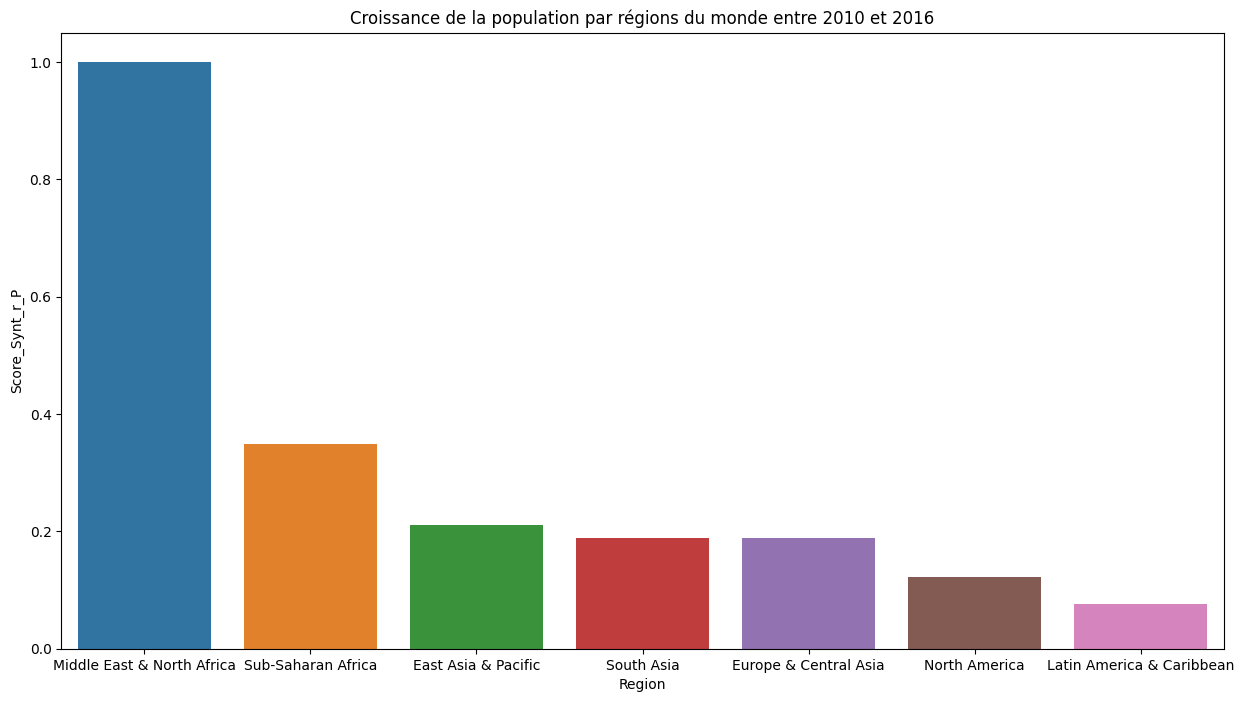

In [213]:
#la figure suivante pour la représentation
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Region', y='Score_Synt_r_P', data=pop_r)
title = plt.title("Croissance de la population par régions du monde entre 2010 et 2016")

**Indicateur 'Internet users (per 100 people)'**

In [214]:
internet_users=indicateur ('IT.NET.USER.P2')
internet_users.isna().sum()

Short Name          0
Indicator Code      0
2010                9
2011                8
2012                9
2013               10
2014               10
2015               10
2016                9
2017              139
2020              139
dtype: int64

In [215]:
internet_users=internet_users.drop(columns=['2017', '2020'])

In [216]:
for i in years_:
    internet_users.loc[internet_users[i].isna(),i] = internet_users[i].median()

In [217]:
somme=0
for i in years_:
    somme += internet_users[i]/internet_users[i].max()
internet_users['Score_Synt_I'] = (somme)/len(years_)
inte=internet_users.sort_values('Score_Synt_I', ascending=False)[['Short Name', 'Indicator Code','Score_Synt_I']].iloc[:10]
inte

,Short Name,Indicator Code,Score_Synt_I
8935,Iceland,IT.NET.USER.P2,0.999820
12755,Norway,IT.NET.USER.P2,0.987196
10594,Luxembourg,IT.NET.USER.P2,0.970520
5281,Denmark,IT.NET.USER.P2,0.968703
2640,Bermuda,IT.NET.USER.P2,0.964725
16211,Sweden,IT.NET.USER.P2,0.955412
12538,Netherlands,IT.NET.USER.P2,0.951563
10269,Liechtenstein,IT.NET.USER.P2,0.943608
285,Andorra,IT.NET.USER.P2,0.936150
6528,United Kingdom,IT.NET.USER.P2,0.926306


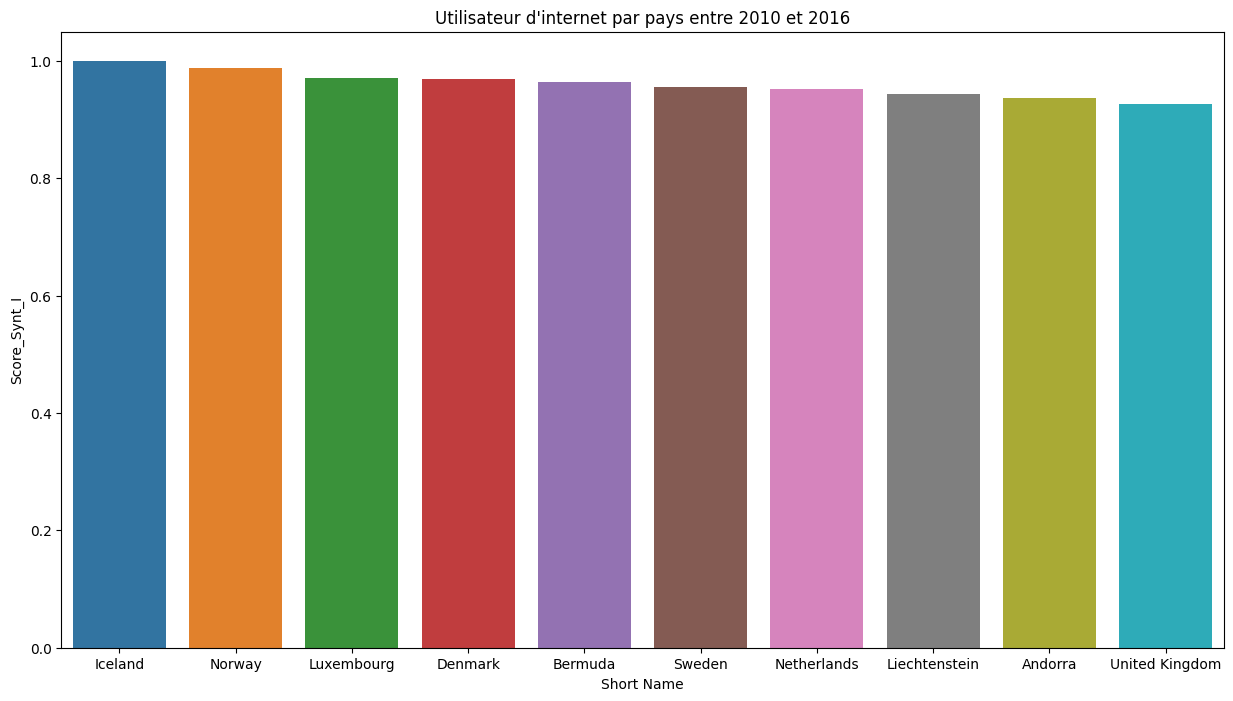

In [218]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Short Name', y='Score_Synt_I', data=inte)
title=plt.title("Utilisateur d'internet par pays entre 2010 et 2016")

In [219]:
internet_users_r=indicateur_region ('IT.NET.USER.P2')
internet_users_r.isna().sum()

Region            1
Indicator Code    0
2010              0
2011              0
2012              0
2013              1
2014              1
2015              1
2016              0
2017              8
2020              8
dtype: int64

In [220]:
idex=internet_users_r.loc[internet_users_r['Region'].isna()].index
internet_users_r=internet_users_r.drop(idex)
internet_users_r=internet_users_r.drop(columns=['2017', '2020'])

In [221]:
somme=0
for i in years_:
    somme += internet_users_r[i]/internet_users_r[i].max()
    internet_users_r['Score_Synt_r_I'] = (somme)/len(years_)
int_r=internet_users_r.sort_values('Score_Synt_r_I', ascending=False)[['Region', 'Indicator Code','Score_Synt_r_I']]
int_r

,Region,Indicator Code,Score_Synt_r_I
12538,Europe & Central Asia,IT.NET.USER.P2,0.995218
0,Latin America & Caribbean,IT.NET.USER.P2,0.850772
18208,North America,IT.NET.USER.P2,0.791552
13066,Middle East & North Africa,IT.NET.USER.P2,0.643821
11605,East Asia & Pacific,IT.NET.USER.P2,0.186206
12827,South Asia,IT.NET.USER.P2,0.145439
12466,Sub-Saharan Africa,IT.NET.USER.P2,0.021586


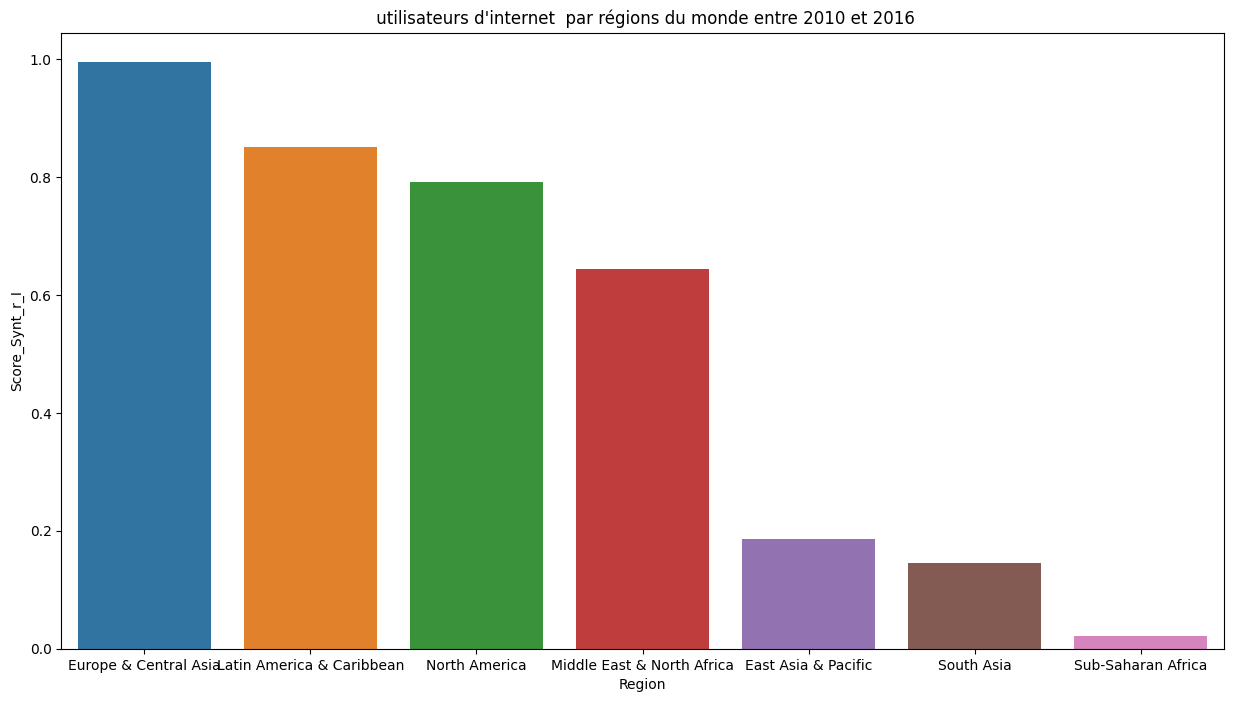

In [222]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Region', y = 'Score_Synt_r_I',data = int_r)
title=plt.title(" utilisateurs d'internet  par régions du monde entre 2010 et 2016")

In [223]:
gdp_capita=indicateur ('NY.GDP.PCAP.CD')
gdp_capita.isna().sum()

Short Name          0
Indicator Code      0
2010                5
2011                5
2012                6
2013                6
2014                8
2015                9
2016               15
2017              139
2020              139
dtype: int64

In [224]:
gdp_capita=gdp_capita.drop(columns=['2017', '2020'])

In [225]:
for i in years_:
    gdp_capita.loc[gdp_capita[i].isna(),i] = gdp_capita[i].median()

In [226]:
somme=0
for i in years_:
    somme += gdp_capita[i]/gdp_capita[i].max()
    gdp_capita['Score_Synt_G'] = (somme)/len(years_)
gdp=gdp_capita.sort_values('Score_Synt_G', ascending=False)[['Short Name', 'Indicator Code','Score_Synt_G']].iloc[:10]
gdp

,Short Name,Indicator Code,Score_Synt_G
10147,Liechtenstein,NY.GDP.PCAP.CD,0.871847
10697,Luxembourg,NY.GDP.PCAP.CD,0.730425
12755,Norway,NY.GDP.PCAP.CD,0.603325
3585,Switzerland,NY.GDP.PCAP.CD,0.557463
14339,Qatar,NY.GDP.PCAP.CD,0.515994
10980,"Macao SAR, China",NY.GDP.PCAP.CD,0.503262
8341,Isle of Man,NY.GDP.PCAP.CD,0.442636
1250,Australia,NY.GDP.PCAP.CD,0.397778
5224,Denmark,NY.GDP.PCAP.CD,0.391770
15295,San Marino,NY.GDP.PCAP.CD,0.383478


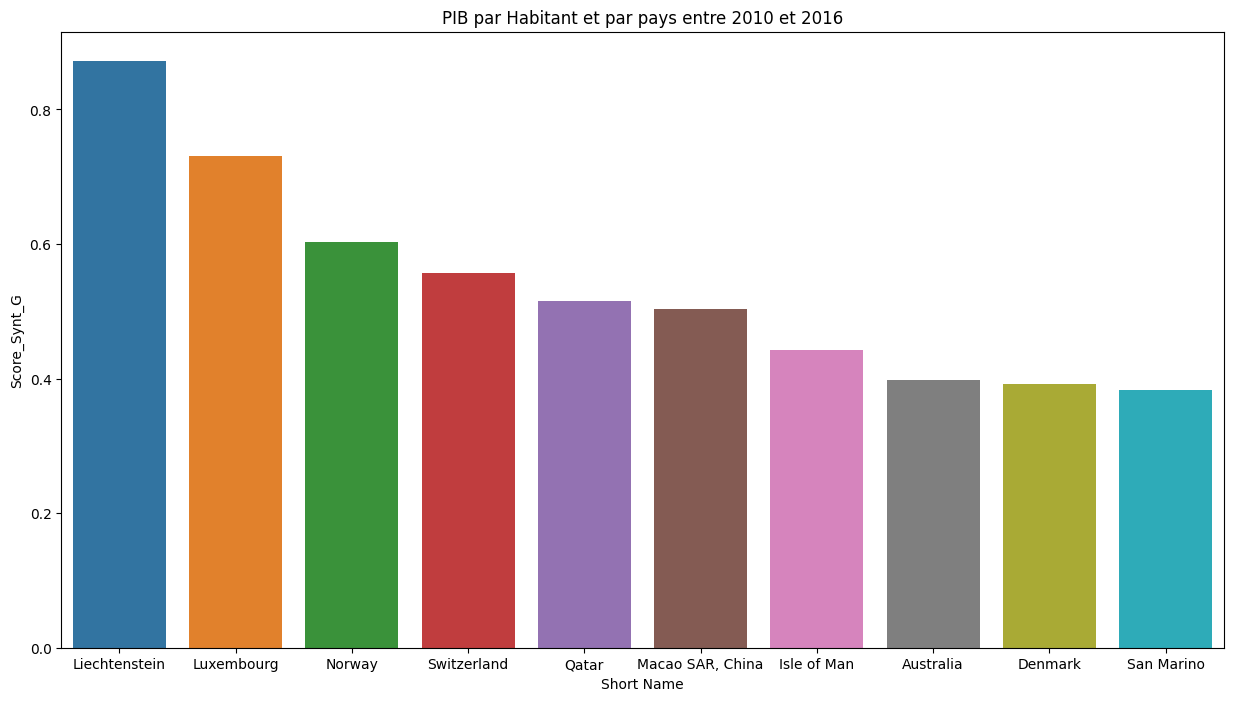

In [227]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Short Name', y = 'Score_Synt_G',data = gdp)
title=plt.title("PIB par Habitant et par pays entre 2010 et 2016")

In [228]:
gdp_capita_r=indicateur_region ('NY.GDP.PCAP.CD')
gdp_capita_r.isna().sum()

Region            1
Indicator Code    0
2010              1
2011              1
2012              1
2013              1
2014              1
2015              1
2016              1
2017              8
2020              8
dtype: int64

In [229]:
idex=gdp_capita_r.loc[gdp_capita_r['Region'].isna()].index
gdp_capita_r=gdp_capita_r.drop(idex)
gdp_capita_r=gdp_capita_r.drop(columns=['2017', '2020'])

In [230]:
somme=0
for i in years_:
    somme += gdp_capita_r[i]/gdp_capita_r[i].max()
    gdp_capita_r['Score_Synt_r_G'] = (somme)/len(years_)
gdp_r=gdp_capita_r.sort_values('Score_Synt_r_G', ascending=False)[['Region', 'Indicator Code','Score_Synt_r_G']]
gdp_r

,Region,Indicator Code,Score_Synt_r_G
18083,North America,NY.GDP.PCAP.CD,0.984420
12538,Europe & Central Asia,NY.GDP.PCAP.CD,0.925526
13066,Middle East & North Africa,NY.GDP.PCAP.CD,0.362460
11744,East Asia & Pacific,NY.GDP.PCAP.CD,0.295707
9660,Latin America & Caribbean,NY.GDP.PCAP.CD,0.279772
12827,South Asia,NY.GDP.PCAP.CD,0.012829
12466,Sub-Saharan Africa,NY.GDP.PCAP.CD,0.007148


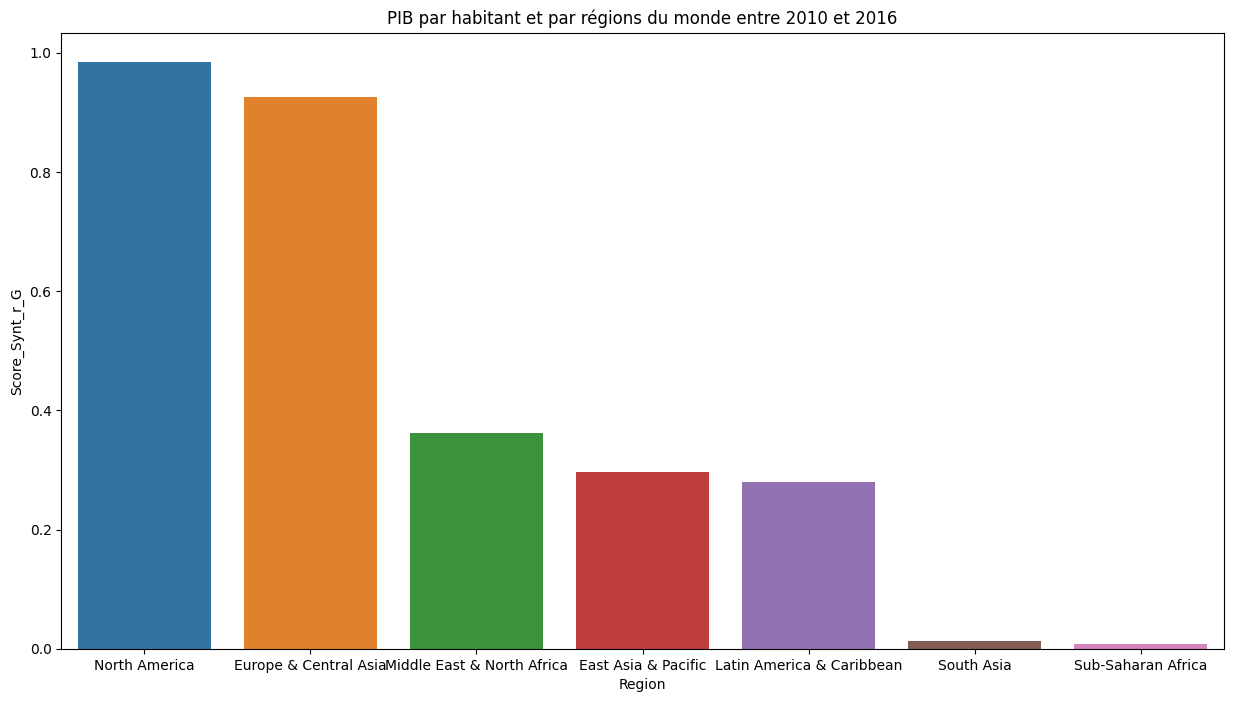

In [231]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Region', y = 'Score_Synt_r_G',data = gdp_r)
title=plt.title("PIB par habitant et par régions du monde entre 2010 et 2016")

**Score par pays et régions du monde relatif aux trois indicateurs**

In [232]:
a = pop['Short Name'].head(5)
list_pop = list(a)
list_pop

['Qatar', 'Oman', 'Kuwait', 'Niger', 'Tanzania']

In [233]:
b = inte['Short Name'].head(5)
list_int = list(b)
list_int

['Iceland', 'Norway', 'Luxembourg', 'Denmark', 'Bermuda']

In [234]:
c = gdp['Short Name'].head(5)
list_gdp = list(c)
list_gdp

['Liechtenstein', 'Luxembourg', 'Norway', 'Switzerland', 'Qatar']

In [235]:
#faison l'unions des trois listes ci-dessous
d = pd.concat([a,b])
d = pd.concat([d,c])
d = d.drop_duplicates()
d

14364            Qatar
13090             Oman
9869            Kuwait
12491            Niger
17800         Tanzania
8935           Iceland
12755           Norway
10594       Luxembourg
5281           Denmark
2640           Bermuda
10147    Liechtenstein
3585       Switzerland
Name: Short Name, dtype: object

In [236]:
Syn_Pays=pd.DataFrame(d,columns=['Short Name'])
Syn_Pays

,Short Name
14364,Qatar
13090,Oman
9869,Kuwait
12491,Niger
17800,Tanzania
8935,Iceland
12755,Norway
10594,Luxembourg
5281,Denmark
2640,Bermuda


A chaque fois qu'un pays appartient à une liste, il voit son score incrémenté d'un point. 

In [237]:
indexes=Syn_Pays.index
x1=np.array([])
x2=np.array([])
x3=np.array([])

for i in indexes:
    if Syn_Pays['Short Name'][i] in list_pop:
        x1=np.append(x1,1)
    else:
        x1=np.append(x1,0)
        
    if Syn_Pays['Short Name'][i] in list_int:
        x2=np.append(x2,1)
    else:
        x2=np.append(x2,0)
        
    if Syn_Pays['Short Name'][i] in list_gdp:
        x3=np.append(x3,1)
    else:
        x3=np.append(x3,0)

Créons une colonne 'Syn_indicateurs' contenant la somme des scores obtenus

In [238]:
Syn_Pays['Syn_indicateurs']=x1+x2+x3
Syn_Pays = Syn_Pays.sort_values('Syn_indicateurs', ascending=False)
Syn_Pays

,Short Name,Syn_indicateurs
14364,Qatar,2.0
12755,Norway,2.0
10594,Luxembourg,2.0
13090,Oman,1.0
9869,Kuwait,1.0
12491,Niger,1.0
17800,Tanzania,1.0
8935,Iceland,1.0
5281,Denmark,1.0
2640,Bermuda,1.0


Pour chacun des trois indicateurs, nus allons définir une liste  contenant les cinq régions du monde y figurant le mieux. 

In [239]:
a = pop_r['Region'].head(10)
list_pop = list(a)

b = int_r['Region'].head(10)
list_int = list(b)

c = gdp_r['Region'].head(10)
list_gdp = list(c)

Faisons l'union de ces trois listes de région du monde 

In [240]:
d = pd.concat([a,b])
d = pd.concat([d,c])
#retirons les doublons
d = d.drop_duplicates()

Définissons un dataframe de ces régions du monde : 

In [241]:
Syn_Region = pd.DataFrame(d,columns=['Region'])
Syn_Region

,Region
13090,Middle East & North Africa
12266,Sub-Saharan Africa
13053,East Asia & Pacific
12790,South Asia
12787,Europe & Central Asia
18100,North America
0,Latin America & Caribbean


In [242]:
indexes=Syn_Region.index
x1=np.array([])
x2=np.array([])
x3=np.array([])

for i in indexes:
    if Syn_Region['Region'][i] in list_pop:
        x1=np.append(x1,1)
    else:
        x1=np.append(x1,0)
        
    if Syn_Region['Region'][i] in list_int:
        x2=np.append(x2,1)
    else:
        x2=np.append(x2,0)
        
    if Syn_Region['Region'][i] in list_gdp:
        x3=np.append(x3,1)
    else:
        x3=np.append(x3,0)

In [243]:
Syn_Region['Syn_indicateurs']=x1+x2+x3
Syn_Region=Syn_Region.sort_values('Syn_indicateurs', ascending=False)[['Region','Syn_indicateurs']]
Syn_Region

,Region,Syn_indicateurs
13090,Middle East & North Africa,3.0
12266,Sub-Saharan Africa,3.0
13053,East Asia & Pacific,3.0
12790,South Asia,3.0
12787,Europe & Central Asia,3.0
18100,North America,3.0
0,Latin America & Caribbean,3.0


**CONCLUSION**

Les données de la banque mondiale nous fournissent assez d'éléments sur le projet d'expansion de l'entreprise. 

Il en ressort que le classement des trois pays ayant un fort potentiel de clients pour nos services relatif à leur forte croissance démographique au nombre d'utilisateurs d'internet et au PIB par habitant sont : 

1. Qatar
2. Norway
3. Luxembourg

Et celui des régions du monde ayant un fort potentiel de clients pour nos services est : 

1. Middle East & North Africa
2. Sub-Saharan Africa
3. East Asia & Pacific